In [7]:
# SUM OF SQUARES ERROR
def sum_of_squares(b, m, points):
    total = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total += (y - (m * x + b)) ** 2  # (y-y')^2 where y'=y*mx+c
    return total / float(len(points))

In [8]:
# GRADIENT DESCENT
def gradient_descent(b_current, m_current, points):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2 / N) * (y - ((m_current * x) + b_current))  # f(x) = x^n
        m_gradient += -(2 / N) * x * (y - ((m_current * x) + b_current))  # f'(x) = n*x^(n-1)
    new_b = b_current - b_gradient
    new_m = m_current - m_gradient
    return [new_b, new_m]


# Support Vector Machines

Hyperplane: Line which best separates classes of data.
SVM helps to create a hyperplane
USes: Classification, Clustering, Outlier Detection, Regression
Useful if a small dataset
Done by maximizing the space between classes: separating them
Points closest to the decision boundary are called support vectors
Hyperplane = n-1 dimensions

Loss function(Hinge Loss):
c(x,y,f(x)) =(1-y*(f(x))+ ; x is the data, y = label, f(x) is the predicted label, + means that if negative result then set to 0

Objective funtion = regularizer+loss function
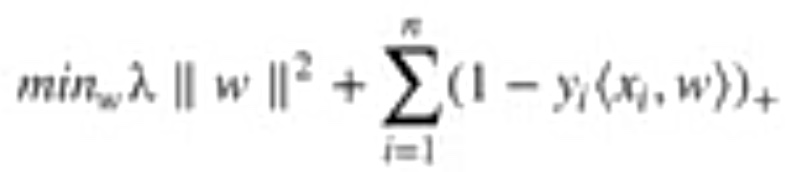

The λ term determines underfitting(if too small) and overfitting(if too large)-> regularizer
To reduce the loss:
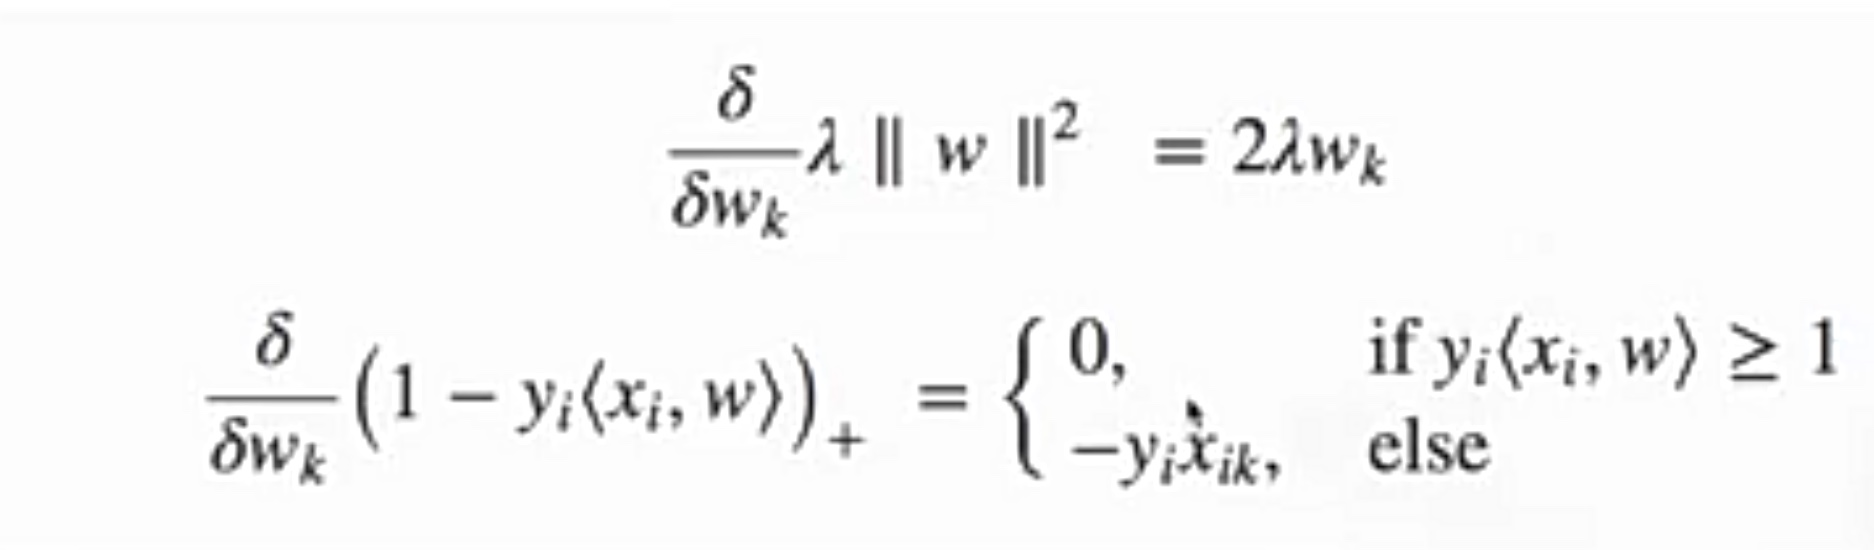

Now the point is either classified or misclassified:

Mis : y<xi,w><1 then updated weights w=w+η(yixi-2λw)
where η is the learning rate and λ is the regularizer

Class: the updated weights w = w+η(-2λw)

In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [-1, 8, 1],
    [0, 4, -1],
    [12, 11, -1],
])  # Where (x,y,bias)

y = np.array([-1, -1, 1, 1, 1])  # labels
'''
for d, sample in enumerate(X):
    if (d < 2):  # plot first two, negative samples
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        # plot positive samples
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
plt.plot([-2, 6], [6, 0.5])
'''

"\nfor d, sample in enumerate(X):\n    if (d < 2):  # plot first two, negative samples\n        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)\n    else:\n        # plot positive samples\n        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)\nplt.plot([-2, 6], [6, 0.5])\n"

In [10]:


def svm_sgd_plot(X,Y):
    w = np.zeros(len(X[0])) #SVM weight vector
    eta = 1 #learning rate
    epochs = 100000 #no of iterations
    errors = [] #to keep a list of errors
    
    #Fromt the above two equations and learning rate as (1/epoch)
    for epoch in range(1,epochs):
        error =0
        for i,x in enumerate(X):
            #For miss
            if (Y[i]*np.dot(X[i],w))<1:
                w = w+eta*((X[i]*Y[i])+(-2*(1/epoch)*w))
                error =1
            else:
                w = w+eta*(-2*(1/epoch)*w)
        errors.append(error)
    plt.plot(errors,'|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel("Epoch")
    plt.ylabel("Missclas")
    plt.show()
    return w 

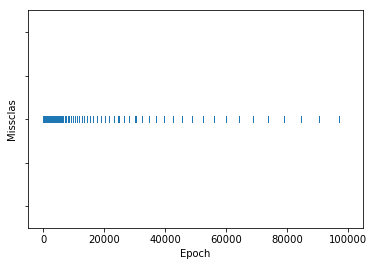

In [11]:
w = svm_sgd_plot(X,y)

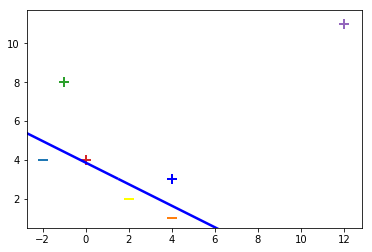

In [12]:
# print all train cases
for d, sample in enumerate(X):
    if(d<2):
        plt.scatter(sample[0],sample[1],s=120,marker='_',linewidth=2)
    else:
        plt.scatter(sample[0],sample[1],s=120,marker='+',linewidth=2)

#plot sample test cases
plt.scatter(2,2,s=120,marker='_',linewidth=2,color="yellow")
plt.scatter(4,3,s=120,marker='+',linewidth=2,color="blue")

#show hyperplane
x2 = [w[0],w[1],-w[1],w[0]]
x3 = [w[0],w[1],w[1],-w[0]]

x2x3 = np.array([x2,x3])
X,Y,U,V= zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale = 1,color="blue")
